In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pred_y = np.load("lstmpred.npy").reshape((-1, 2))
print pred_y.shape

(5400L, 2L)


In [3]:
X = np.loadtxt("London_data_2x1000Center_bin100.dat")
y = np.loadtxt("London_data_2x1000Center_bin100_pos.dat") / 3.5
print X.shape, y.shape

(5400L, 344L) (5400L, 2L)


In [4]:
def mse(y, t, axis=2):
    return (np.square(y - t).mean(axis=axis).mean())

def mean_distance(y, t, axis=2):
    return np.mean(np.sqrt(np.sum((y - t)**2, axis=axis)))

In [7]:
print mse(pred_y[:1100], y[:1100], axis=1), mean_distance(pred_y[:1100], y[:1100], axis=1)
print mse(pred_y[4400:], y[4400:], axis=1), mean_distance(pred_y[4400:], y[4400:], axis=1)

105.933380622 12.4324665941
82.1831913863 10.803131842


In [9]:
errors = np.sqrt(np.sum((pred_y - y)**2, axis=1))
print np.mean(errors), errors.shape

10.9135301773 (5400L,)


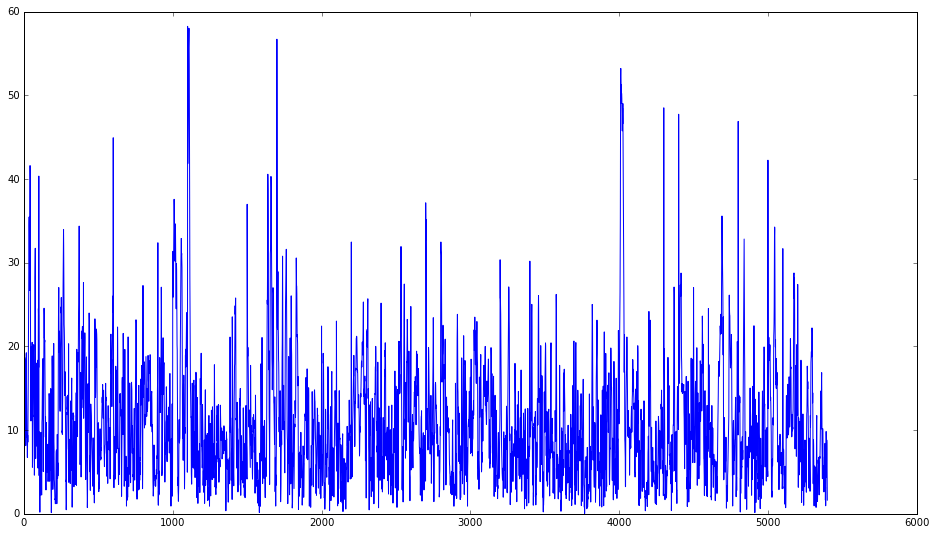

In [53]:
plt.figure(figsize=(16,9))
plt.plot(errors);

(54L, 100L)
(100L,)


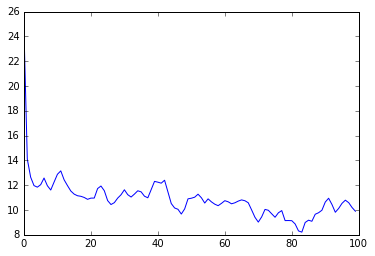

In [56]:
seqerrors = np.reshape(errors, (-1,100))
print seqerrors.shape
meanerrors = np.mean(seqerrors, axis=0)
print meanerrors.shape
#plt.figure(figsize=(10,6))
plt.plot(meanerrors);

In [54]:
pred_y2 = np.load("bilstmpred.npy").reshape((-1, 2))
print pred_y2.shape
errors2 = np.sqrt(np.sum((pred_y2 - y)**2, axis=1))
print errors2.shape

(5400L, 2L)
(5400L,)


(54L, 100L)
(100L,)


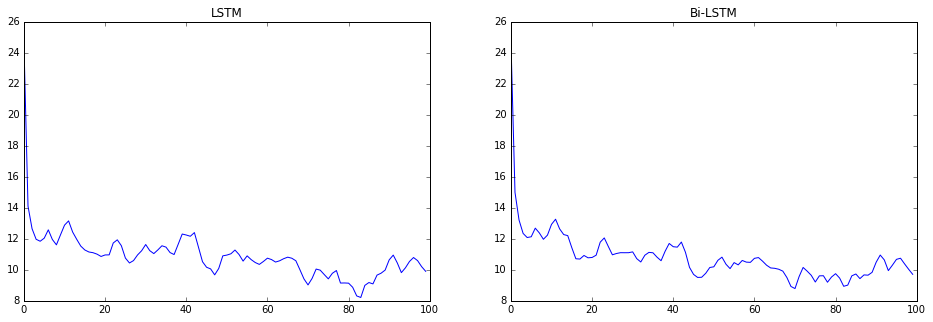

In [60]:
seqerrors2 = np.reshape(errors2, (-1,100))
print seqerrors2.shape
meanerrors2 = np.mean(seqerrors2, axis=0)
print meanerrors2.shape
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(meanerrors);
plt.title("LSTM")
plt.subplot(1,2,2)
plt.plot(meanerrors2);
plt.title("Bi-LSTM")

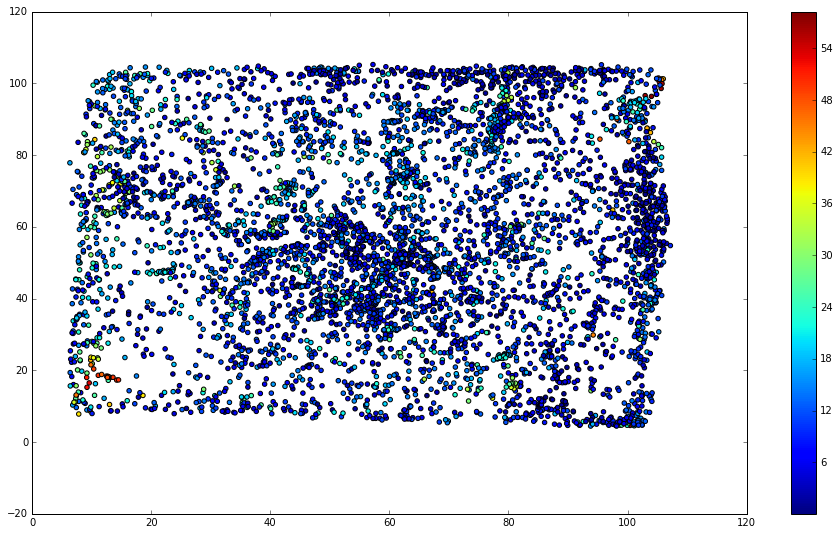

In [11]:
plt.figure(figsize=(16,9))
plt.scatter(y[:,0], y[:,1],c=errors)
plt.colorbar();

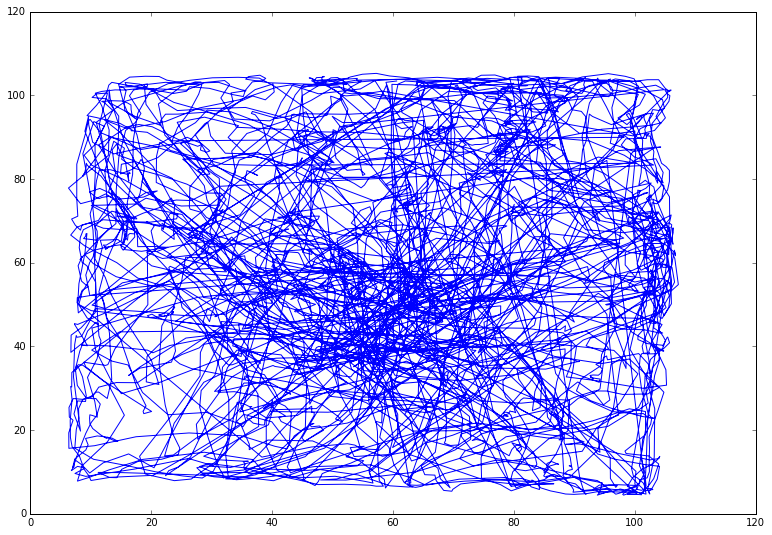

In [42]:
plt.figure(figsize=(13,9))
plt.plot(y[:,0], y[:,1]);

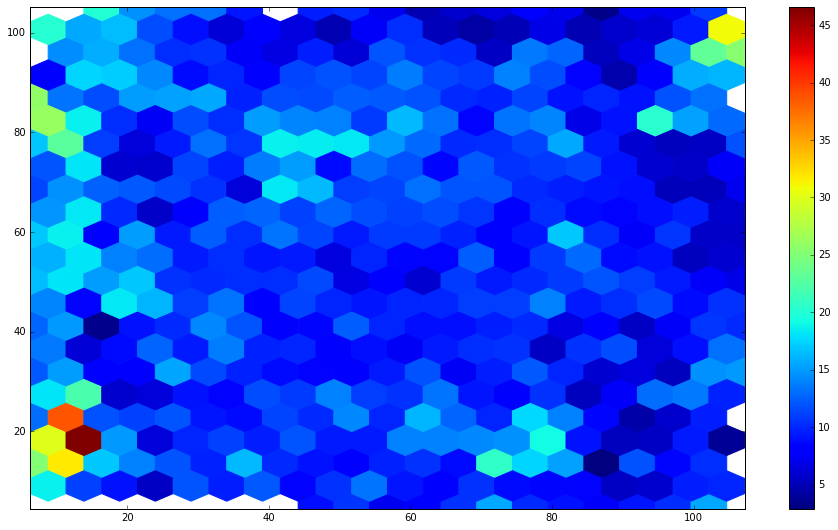

In [49]:
plt.figure(figsize=(16,9))
plt.hexbin(y[:,0], y[:,1],C=errors, gridsize=20)
plt.colorbar();

In [17]:
diff = y[1:] - y[:-1]
print diff.shape

(5399L, 2L)


In [19]:
angles = np.arctan2(diff[:,1], diff[:,0])
print angles.shape

(5399L,)


In [40]:
from scipy.stats import binned_statistic
import math

In [44]:
nb_bins = 100
bins = binned_statistic(angles, errors[1:], statistic='mean', bins=nb_bins)
print bins, len(bins.bin_edges), len(bins.statistic)

BinnedStatisticResult(statistic=array([ 10.42515226,   9.97585336,  11.19585177,  11.98090771,
         9.64651601,  11.12673804,  12.42852253,   9.5075064 ,
        11.1934632 ,  10.82165438,  11.41552956,  10.58787783,
        10.54383692,  11.42239282,  11.42357584,  10.6023488 ,
        11.04606324,  13.53649019,  10.33223807,  10.11052378,
        12.25055968,   9.76147051,  10.29877033,  12.24259294,
        10.53483155,  10.50759614,  10.5595758 ,  11.69261072,
         9.83589914,  11.43574206,   9.42469854,  11.61662358,
        11.26461127,  11.21111961,  10.57765624,   9.70145327,
        11.93592099,  12.14510585,  11.61937488,  10.06710238,
        11.58482229,  15.59767978,   9.89187001,  11.23829901,
        11.48869008,  11.24827401,  10.8174327 ,   9.77848889,
         9.03202552,  11.68164425,  11.57454052,  11.90250624,
        11.53532294,  10.88240782,  11.58117593,  10.52703533,
         9.94624305,  10.27861764,   9.68213574,   9.79398744,
        10.70257275,   

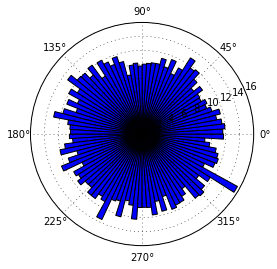

In [47]:
plt.gca(projection='polar')
plt.bar(bins.bin_edges[:-1], bins.statistic, width=2*math.pi/nb_bins);